<a href="https://colab.research.google.com/github/Himanshu-1703/DL_concepts/blob/main/ANN_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L2

In [ ]:
# install new version of mlxtend
!pip install mlxtend -- upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [ ]:
# generate data

X,y = make_moons(n_samples=200,noise=0.2,random_state=32)

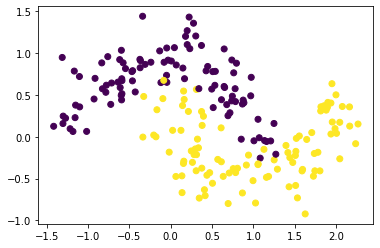

In [ ]:
# plot the graph

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [ ]:
# build the model without regularization

model1 = Sequential()
model1.add(Dense(units=120,input_dim=2,activation='relu'))
model1.add(Dense(units=120,activation='relu'))
model1.add(Dense(units=1,activation='sigmoid'))

model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               360       
                                                                 
 dense_1 (Dense)             (None, 120)               14520     
                                                                 
 dense_2 (Dense)             (None, 1)                 121       
                                                                 
Total params: 15,001
Trainable params: 15,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model1.fit(X,y,validation_split=0.2,epochs=300)

Epoch 1/300
5/5 [==============================] - 1s 65ms/step - loss: 0.6764 - accuracy: 0.6375 - val_loss: 0.6238 - val_accuracy: 0.8250
Epoch 2/300
5/5 [==============================] - 0s 15ms/step - loss: 0.6102 - accuracy: 0.8000 - val_loss: 0.5579 - val_accuracy: 0.8250
Epoch 3/300
5/5 [==============================] - 0s 11ms/step - loss: 0.5555 - accuracy: 0.8000 - val_loss: 0.5011 - val_accuracy: 0.8250
Epoch 4/300
5/5 [==============================] - 0s 15ms/step - loss: 0.5057 - accuracy: 0.8062 - val_loss: 0.4506 - val_accuracy: 0.8250
Epoch 5/300
5/5 [==============================] - 0s 11ms/step - loss: 0.4595 - accuracy: 0.8250 - val_loss: 0.4076 - val_accuracy: 0.8250
Epoch 6/300
5/5 [==============================] - 0s 15ms/step - loss: 0.4199 - accuracy: 0.8250 - val_loss: 0.3743 - val_accuracy: 0.8500
Epoch 7/300
5/5 [==============================] - 0s 13ms/step - loss: 0.3889 - accuracy: 0.8313 - val_loss: 0.3505 - val_accuracy: 0.8500
Epoch 8/300
5/5 [===

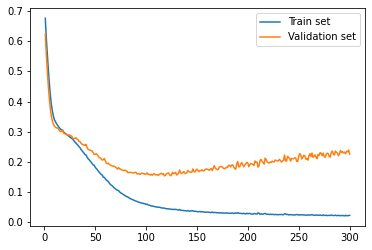

In [ ]:
# plot loss plots

plt.plot(range(1,301),history.history['loss'],label='Train set')
plt.plot(range(1,301),history.history['val_loss'],label='Validation set')
plt.legend()
plt.show()

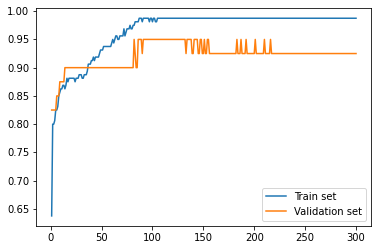

In [ ]:
# plot accuracy plots

plt.plot(range(1,301),history.history['accuracy'],label='Train set')
plt.plot(range(1,301),history.history['val_accuracy'],label='Validation set')
plt.legend()
plt.show()

The model is overfitting.   
The train accuracy is high compared to validation accuracy. 

In [ ]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.9 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


3888/3888 [==============================] - 4s 909us/step


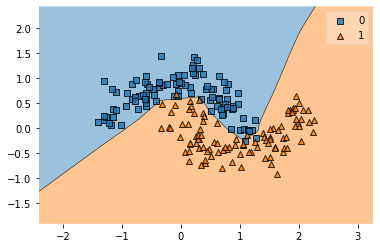

In [ ]:
# plot decision boundaries
from mlxtend.plotting import plot_decision_regions

plot1 = plot_decision_regions(X,y,clf=model1)

In [ ]:
# build the model regularization

reg = L2(0.02)
model2 = Sequential()
model2.add(Dense(units=120,input_dim=2,activation='relu',kernel_regularizer=reg))
model2.add(Dense(units=120,activation='relu',kernel_regularizer=reg))
model2.add(Dense(units=1,activation='sigmoid'))

model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 120)               360       
                                                                 
 dense_4 (Dense)             (None, 120)               14520     
                                                                 
 dense_5 (Dense)             (None, 1)                 121       
                                                                 
Total params: 15,001
Trainable params: 15,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model2.fit(X,y,validation_split=0.2,epochs=300)

Epoch 1/300
5/5 [==============================] - 1s 58ms/step - loss: 3.0608 - accuracy: 0.8188 - val_loss: 2.9072 - val_accuracy: 0.8250
Epoch 2/300
5/5 [==============================] - 0s 11ms/step - loss: 2.8235 - accuracy: 0.8313 - val_loss: 2.6775 - val_accuracy: 0.8250
Epoch 3/300
5/5 [==============================] - 0s 11ms/step - loss: 2.6062 - accuracy: 0.8062 - val_loss: 2.4670 - val_accuracy: 0.8250
Epoch 4/300
5/5 [==============================] - 0s 10ms/step - loss: 2.4052 - accuracy: 0.8062 - val_loss: 2.2742 - val_accuracy: 0.8250
Epoch 5/300
5/5 [==============================] - 0s 11ms/step - loss: 2.2191 - accuracy: 0.8062 - val_loss: 2.0957 - val_accuracy: 0.8250
Epoch 6/300
5/5 [==============================] - 0s 14ms/step - loss: 2.0483 - accuracy: 0.8250 - val_loss: 1.9306 - val_accuracy: 0.8250
Epoch 7/300
5/5 [==============================] - 0s 10ms/step - loss: 1.8911 - accuracy: 0.8188 - val_loss: 1.7780 - val_accuracy: 0.8250
Epoch 8/300
5/5 [===

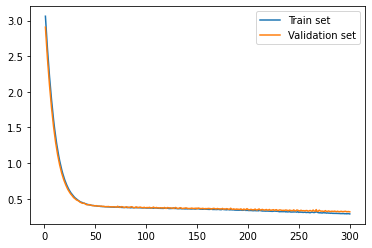

In [ ]:
# plot loss plots

plt.plot(range(1,301),history.history['loss'],label='Train set')
plt.plot(range(1,301),history.history['val_loss'],label='Validation set')
plt.legend()
plt.show()

Both training and validation loss are decreasing smoothly after applying regularization.

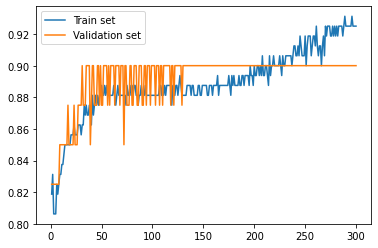

In [ ]:
# plot accuracy plots

plt.plot(range(1,301),history.history['accuracy'],label='Train set')
plt.plot(range(1,301),history.history['val_accuracy'],label='Validation set')
plt.legend()
plt.show()

The model is not overfitting and train and test accuracy are almost similar.

3888/3888 [==============================] - 8s 2ms/step


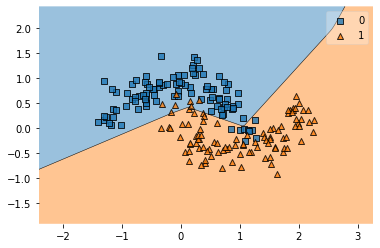

In [ ]:
# plot decision boundaries of the model
plot2 = plot_decision_regions(X,y,clf=model2)
plt.show()

9720/9720 [==============================] - 9s 965us/step


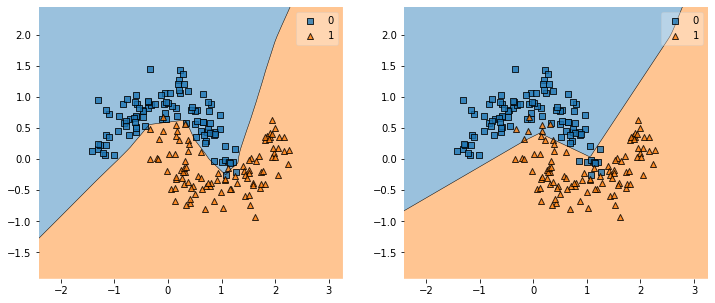

In [ ]:
# plot decision boundaries side by side

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plot_decision_regions(X,y,model1)

plt.subplot(1,2,2)
plot_decision_regions(X,y,model2)

plt.show()

The decision boundaries after applying regularization is having the shape without much smoothening taking place which is doing some mis-classifications on the training data to reduce the overfitting.

In [ ]:
# get the weights of models

weights1 = model1.get_weights()[0][0].reshape(120)
weights2 = model2.get_weights()[0][0].reshape(120)

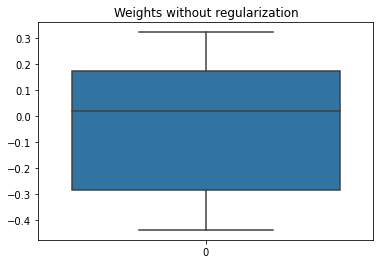

In [ ]:
# plot boxplots

import seaborn as sns

sns.boxplot(weights1)
plt.title('Weights without regularization')
plt.show()

The weights are spread across a large range as observed through the boxplot

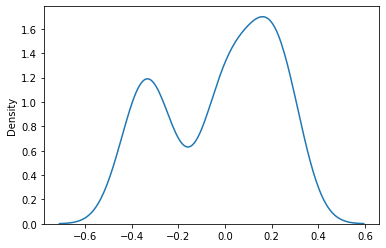

In [ ]:
sns.kdeplot(weights1)
plt.show()

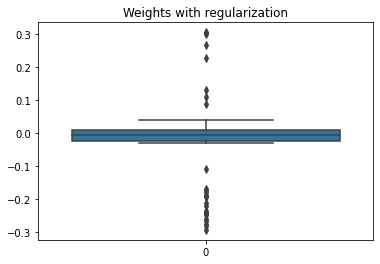

In [ ]:
sns.boxplot(weights2)
plt.title('Weights with regularization')
plt.show()

Most of the weights are in a very narrow range and are very close to 0 due to ridge regularization.

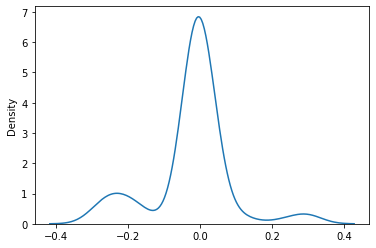

In [ ]:
sns.kdeplot(weights2)
plt.show()